In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Tuple
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

Файл heart.csv содержит следующие колонки:

    1. age - возраст в годах;
    2. sex - пол (1-мужской, 0-женский);
    3. chest pain type - тип боли в груди (1-типичная стенокардия, 2-атипичная стенокардия, 3-неангинальная боль, 4-     бессимптомная);
    4. trestbps - артериальное давление в покое (в мм рт.ст. при поступлении в стационар);
    5. chol - уровень холестерина в крови в мг/дл;
    6. fbs - (уровень сахара в крови натощак > 120 мг/дл) (1 = верно; 0 = неверно);
    7. restecg -  результаты кардиографии в покое (0-нормальное, 1-наличие аномалии волны ST-T, 2-выявление вероятной или определенной гипертрофии левого желудочка по критериям Эстеса);
    8. thalach - максимальная частота сердечных сокращений;
    9. exang - стенокардия, вызванная физической нагрузкой (1-да, 0-нет);
    10. oldpeak - ST-депрессия, вызванная физическими упражнениями относительно отдыха;
    11. slope - наклон пикового упражнения ST-сегмента (1-наклон вверх, 2-ровно, 3-наклон вниз);
    12. ca - количество крупных сосудов (0-3), окрашенных с помощью флюороскопии;
    13. thal - тал (3=нормальный, 6=исправленный дефект, 7=обратимый дефект);
    14. target - целевой признак, ангиографический статус заболевания: 0-сужение диаметра < 50% (болезни нет), 1- > сужение диаметра 50% (болезнь есть), в любом крупном сосуде.

In [20]:
# Загружаем датасет (датасет укорочен)
data = pd.read_csv(r'C:\Users\Masha\virtualenvs\tensorflow\data\heart_short.csv', sep=",")

In [21]:
# Первые пять строк датасета
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Размер датасета - 303 строк, 14 колонок
data.shape

(10, 14)

In [23]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 10


In [24]:
# Список колонок
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
# Список колонок с типами данных
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [26]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 0
thal - 0
target - 0


In [27]:
# Количество значений целевого признака (0,1)
data.target.value_counts()

1    5
0    5
Name: target, dtype: int64

In [28]:
# Процентное распределение целевого признака
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 50.00%
Percentage of Patients Have Heart Disease: 50.00%


## Кодирование категориальных признаков

In [29]:
# cp, slope, thal - категориальные признаки, преобразуем их в числовые
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [30]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_0,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,0,1,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,1,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,0,0,1,0,0,0,1


In [31]:
# Удалим столбцы cp, slope, thal
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_0,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,0,1,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,0,1,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,0,1,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,1,0,0,0,0,1,0,0,0,1


## Разделение выборки на обучающую и тестовую

In [32]:
# y - целевой признак, в x - остальные значения
y = data.target.values
#x_data = data.drop(['target'], axis = 1)

In [33]:
# Нормализуем
#x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [34]:
# Разделим датасет на обучающую (60%) и тестовую выборки (40%)
x_train, x_test, y_train, y_test = train_test_split(data,y,test_size = 0.4,random_state=1)

## Алгоритм метода k-ближайших соседей

In [35]:
from enum import Enum
class PredictionType(Enum):
    CLASSIFICATION = 1
    REGRESSION = 2

In [36]:
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np

class SimpleKNN:
    
    def fit(self, X_train: np.matrix, y_train: np.ndarray):
        """
        Метод обучения, который фактически не учится, 
        а только запоминает обучающую выборку.
        Входные параметры:
        X_train - обучающая выборка (матрица объект-признак)
        y_train - обучающая выборка (вектор целевого признака)
        Возвращаемое значение: нет
        """
        #Сохраняем параметры в переменных класса
        self._X_train = X_train
        self._y_train = y_train
          
    def eucl_dist(self, p: np.ndarray, q: np.ndarray) -> float:
        """
        Вычисление Евклидова расстояния - https://en.wikipedia.org/wiki/Euclidean_distance 
        Входные параметры:
        p, q - вектора в n-мерном пространстве признаков
        """
        return sum([(pi - qi) ** 2 for pi, qi in zip (p, q)])
            
            
    def predict_for_single_object(self, K: int, \
                prediction_type: PredictionType, \
                X_o: np.ndarray, \
                verbose = True) -> np.ndarray:
        """
        Метод предсказания для одного объекта.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_o - строка матрицы объект-признак, соответствующая объекту
        verbose - флаг детального вывода
        Возвращаемое значение: предсказанное значение целевого признака
        """
        # список соседей
        neighbors_list = []
        # *** Находим ближайшие точки ***
        # Перебираем все точки обучающей выборки
        for i in range(self._X_train.shape[0]):
            # получаем текущую точку
            data_train_current_x = [x for x in self._X_train[['chol','thalach']].iloc[i]]
            # и значение ее y
            data_train_current_y = self._y_train[i]
            # вычисляем расстояние
            dist = self.eucl_dist(X_o, data_train_current_x)
            # сохраняем в список соседей
            temp_res = (data_train_current_y, dist, data_train_current_x)
            neighbors_list.append(temp_res)
        # *** сортируем список соседей по возрастанию расстояния *** 
        # в кортеже элементы следуют в порядке (0,1,2), сортируем по первому элементу 
        neighbors_list_sorted = sorted(neighbors_list, key=itemgetter(1))
        if verbose:
            print('**************************************')
            print('Проверяемая точка: ', X_o)
            print('Вывод отсортированного списка соседей:')    
            dist_list = []
            for cur_y, cur_dist, _ in neighbors_list_sorted:
                print('y={0}, расстояние={1:.2f}'.format(cur_y, cur_dist))
                dist_list.append(cur_dist)
            print()
            print('Вывод расстояния для отсортированного списка соседей:')    
            plt.plot(dist_list)
            plt.show()
        # Оставим только K ближайших соседей
        K_neighbors_list_sorted = neighbors_list_sorted[:K]
        if verbose:
            print('Вывод К ближайших соседей:')
            x1_list = []
            x2_list = []
            for cur_y, cur_dist, temp_x_1_2 in K_neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                x1_list.append(temp_x1)
                x2_list.append(temp_x2)
                print('y={0}, расстояние={1:.2f}'.format(cur_y, cur_dist))
            print()
            print('Визуализация К ближайших соседей:')
            plt.plot(self._X_train['chol'], self._X_train['thalach'], 'b.', \
                     x1_list, x2_list,  'g*', \
                    [X_o[0]], [X_o[1]], 'ro')
            plt.show()   
        # Результат - классификация или регрессия
        if prediction_type == PredictionType.REGRESSION:
            # используем numpy для вычисления среднего значения
            arr = np.array([x for x,_,_ in K_neighbors_list_sorted])
            # возвращаем среднее значение
            return np.mean(arr)          
        elif prediction_type == PredictionType.CLASSIFICATION:
            k_y_list = [y for y,_,_ in K_neighbors_list_sorted]
            # группируем с количеством метки классов,
            # соответствующие K ближайшим соседям
            k_y_list_grouped_temp = np.unique(k_y_list, return_counts=True)
            k_y_list_grouped = [[key, cnt] for key, cnt in zip(k_y_list_grouped_temp[0], k_y_list_grouped_temp[1])]
            # сортируем по количеству по убыванию
            k_y_list_grouped_sorted = sorted(k_y_list_grouped, key=itemgetter(1), reverse=True)
            if verbose:
                print('Классы, соответствующие К ближайшим соседям:')
                for i in k_y_list_grouped_sorted:
                    print('класс={0}, количество элементов={1}'.format(i[0], i[1]))
            # возвращаеv метку класса из первой строки отсортированного массива
            # то есть того класса, к которому принадлежит наибольшее количество соседей
            return k_y_list_grouped_sorted[0][0]
        else:
            raise Exception('Неизвестный тип предсказания')
                   
    
    def predict(self, K: int, \
                prediction_type: PredictionType, \
                X_test: np.matrix, 
                verbose = True) -> np.ndarray:
        """
        Метод предсказания.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_test - тестовая выборка (матрица объект-признак)
        Возвращаемое значение: предсказанный вектор целевого признака
        """
        # Перебираем все точки тестовой выборки
        test_data_temp = []
        for i in range(X_test.shape[0]):
            # получаем текущую точку
            data_test_current_x = [x for x in X_test.iloc[i]]
            test_data_temp.append(data_test_current_x)       
        return [self.predict_for_single_object(K=K, \
                prediction_type=prediction_type, \
                X_o=i, verbose=verbose) for i in test_data_temp]

In [37]:
simple_knn_clas = SimpleKNN()
simple_knn_clas.fit(x_train[['chol','thalach']], data['target'])

In [38]:
# ПОПЫТКА
# первая строка тестовой выборки
data_test_0 = [x for x in x_test[['chol','thalach']].iloc[0]]
data_test_0

[204, 172]

**************************************
Проверяемая точка:  [204, 172]
Вывод отсортированного списка соседей:
y=1, расстояние=1060.00
y=1, расстояние=1325.00
y=1, расстояние=2341.00
y=1, расстояние=11234.00
y=0, расстояние=11336.00
y=1, расстояние=12456.00

Вывод расстояния для отсортированного списка соседей:


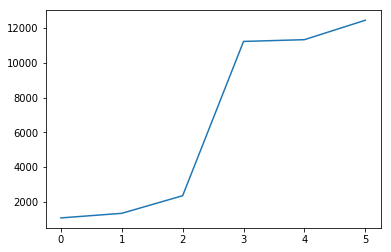

Вывод К ближайших соседей:
y=1, расстояние=1060.00
y=1, расстояние=1325.00
y=1, расстояние=2341.00
y=1, расстояние=11234.00
y=0, расстояние=11336.00

Визуализация К ближайших соседей:


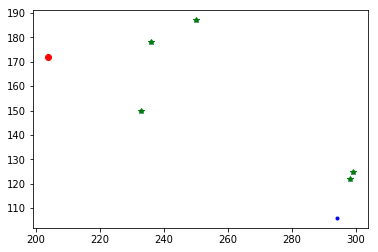

Классы, соответствующие К ближайшим соседям:
класс=1, количество элементов=4
класс=0, количество элементов=1


1

In [39]:
# построим предсказание для одного объекта (классификация)
simple_knn_clas_0 = simple_knn_clas.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_o=data_test_0)
simple_knn_clas_0

**************************************
Проверяемая точка:  [204, 172]
Вывод отсортированного списка соседей:
y=1, расстояние=1060.00
y=1, расстояние=1325.00
y=1, расстояние=2341.00
y=1, расстояние=11234.00
y=0, расстояние=11336.00
y=1, расстояние=12456.00

Вывод расстояния для отсортированного списка соседей:


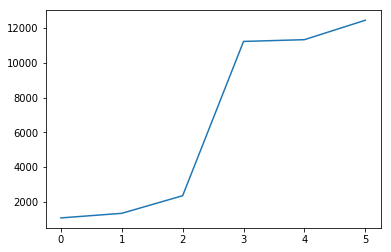

Вывод К ближайших соседей:
y=1, расстояние=1060.00
y=1, расстояние=1325.00
y=1, расстояние=2341.00

Визуализация К ближайших соседей:


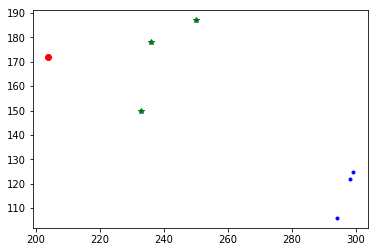

Классы, соответствующие К ближайшим соседям:
класс=1, количество элементов=3
**************************************
Проверяемая точка:  [273, 125]
Вывод отсортированного списка соседей:
y=0, расстояние=634.00
y=1, расстояние=676.00
y=1, расстояние=802.00
y=1, расстояние=2225.00
y=1, расстояние=4178.00
y=1, расстояние=4373.00

Вывод расстояния для отсортированного списка соседей:


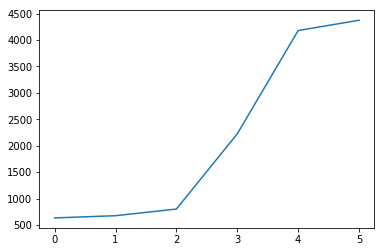

Вывод К ближайших соседей:
y=0, расстояние=634.00
y=1, расстояние=676.00
y=1, расстояние=802.00

Визуализация К ближайших соседей:


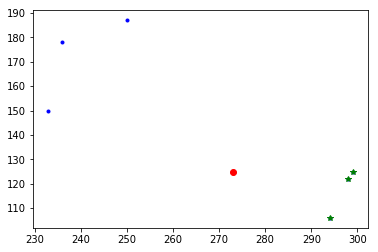

Классы, соответствующие К ближайшим соседям:
класс=1, количество элементов=2
класс=0, количество элементов=1
**************************************
Проверяемая точка:  [247, 143]
Вывод отсортированного списка соседей:
y=1, расстояние=245.00
y=1, расстояние=1346.00
y=1, расстояние=1945.00
y=1, расстояние=3028.00
y=0, расстояние=3042.00
y=1, расстояние=3578.00

Вывод расстояния для отсортированного списка соседей:


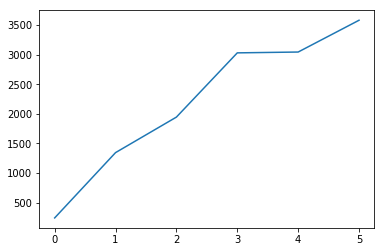

Вывод К ближайших соседей:
y=1, расстояние=245.00
y=1, расстояние=1346.00
y=1, расстояние=1945.00

Визуализация К ближайших соседей:


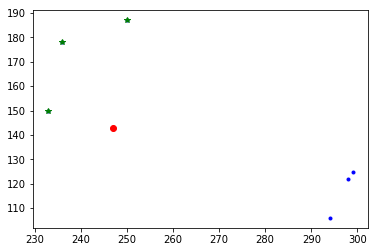

Классы, соответствующие К ближайшим соседям:
класс=1, количество элементов=3
**************************************
Проверяемая точка:  [354, 163]
Вывод отсортированного списка соседей:
y=1, расстояние=4469.00
y=0, расстояние=4817.00
y=1, расстояние=6849.00
y=1, расстояние=11392.00
y=1, расстояние=14149.00
y=1, расстояние=14810.00

Вывод расстояния для отсортированного списка соседей:


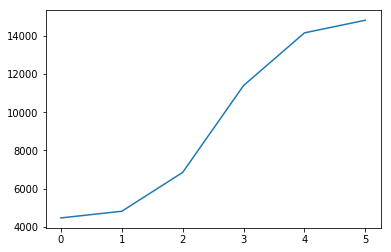

Вывод К ближайших соседей:
y=1, расстояние=4469.00
y=0, расстояние=4817.00
y=1, расстояние=6849.00

Визуализация К ближайших соседей:


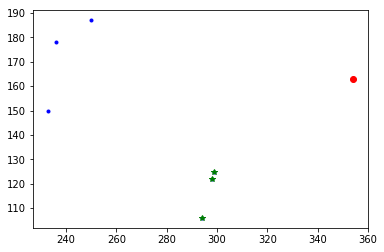

Классы, соответствующие К ближайшим соседям:
класс=1, количество элементов=2
класс=0, количество элементов=1


[1, 1, 1, 1]

In [40]:
# Для всех объектов тестовой выборки (классификация)
simple_knn_clas_prediction = simple_knn_clas.predict(K=3, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_test=x_test[['chol','thalach']])
simple_knn_clas_prediction

## Оценка качества модели

In [111]:
# Загружаем датасет (снова разделим датасет на тестовую и обучающую выборки, тк здесь представлен датасет в полном объеме)
data_2 = pd.read_csv(r'C:\Users\Masha\virtualenvs\tensorflow\data\heart.csv', sep=",")

In [112]:
a = pd.get_dummies(data_2['cp'], prefix = "cp")
b = pd.get_dummies(data_2['thal'], prefix = "thal")
c = pd.get_dummies(data_2['slope'], prefix = "slope")
frames = [data_2, a, b, c]
data_2 = pd.concat(frames, axis = 1)
# Удалим столбцы cp, slope, thal
data_2 = data_2.drop(columns = ['cp', 'thal', 'slope'])
data_2.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [117]:
y_2 = data_2.target.values
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(data_2,y_2,test_size = 0.4,random_state=1)

## Accuracy

In [75]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(x_train_2, y_train_2)
target1_1 = cl1_1.predict(x_test_2)
target1_1

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [13]:
# 2 ближайщих соседа
accuracy_score(y_test_2, target1_1)

0.5491803278688525

In [11]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(x_train_2, y_train_2)
target1_2 = cl1_2.predict(x_test_2)
target1_2

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [14]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [15]:
# 2 ближайших соседа
print_accuracy_score_for_classes(y_test_2, target1_1)

Метка 	 Accuracy
0 	 0.7068965517241379
1 	 0.40625


In [16]:
# 10 ближайших соседей
print_accuracy_score_for_classes(y_test_2, target1_2)

Метка 	 Accuracy
0 	 0.6379310344827587
1 	 0.640625


In [17]:
balanced_accuracy_score(y_test_2, target1_1)

0.556573275862069

In [18]:
balanced_accuracy_score(y_test_2, target1_2)

0.6392780172413793

## Матрица ошибок

In [44]:
confusion_matrix(y_test_2, target1_1, labels=[0, 1])

array([[41, 17],
       [38, 26]], dtype=int64)

In [45]:
tn, fp, fn, tp = confusion_matrix(y_test_2, target1_1).ravel()
tn, fp, fn, tp

(41, 17, 38, 26)

In [47]:
# Вывод матрицы ошибок в графическом виде
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data   
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


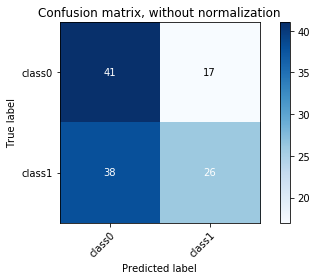

In [48]:
plot_confusion_matrix(y_test_2, target1_1, 
                      classes=np.array(['class0', 'class1']),
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


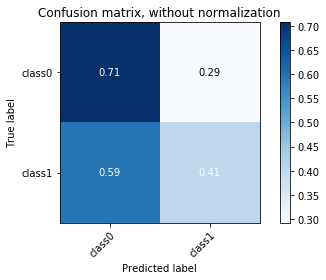

In [49]:
# Нормализованная матрица ошибок (значения в долях от 0 до 1)
plot_confusion_matrix(y_test_2, target1_1, 
                      classes=np.array(['class0', 'class1']),
                      normalize=True,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization


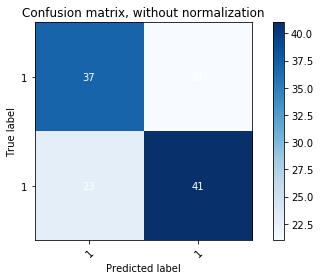

In [53]:
# Матрица ошибок для трех классов
# Для 2 ближайших соседей
plot_confusion_matrix(y_test_2, target1_2, 
                      classes=data.target,
                      title='Confusion matrix, without normalization')

## F-мера

In [56]:
f1_score(y_test_2, target1_2)

0.6507936507936509

In [57]:
f1_score(y_test_2, target1_1, average='micro')

0.5491803278688525

In [58]:
f1_score(y_test_2, target1_1, average='macro')

0.5422607271983082

In [59]:
f1_score(y_test_2, target1_1, average='weighted')

0.5394928869300906

In [84]:
target_names=['YES', 'NO']
target_names

['YES', 'NO']

In [85]:
classification_report(y_test_2, target1_1, target_names=target_names)

'              precision    recall  f1-score   support\n\n         YES       0.52      0.71      0.60        58\n          NO       0.60      0.41      0.49        64\n\n   micro avg       0.55      0.55      0.55       122\n   macro avg       0.56      0.56      0.54       122\nweighted avg       0.56      0.55      0.54       122\n'

In [86]:
classification_report(y_test_2, target1_1, 
                      target_names=target_names, output_dict=True)

{'NO': {'f1-score': 0.48598130841121495,
  'precision': 0.6046511627906976,
  'recall': 0.40625,
  'support': 64},
 'YES': {'f1-score': 0.5985401459854014,
  'precision': 0.5189873417721519,
  'recall': 0.7068965517241379,
  'support': 58},
 'macro avg': {'f1-score': 0.5422607271983082,
  'precision': 0.5618192522814247,
  'recall': 0.556573275862069,
  'support': 122},
 'micro avg': {'f1-score': 0.5491803278688525,
  'precision': 0.5491803278688525,
  'recall': 0.5491803278688525,
  'support': 122},
 'weighted avg': {'f1-score': 0.5394928869300906,
  'precision': 0.5639257396835201,
  'recall': 0.5491803278688525,
  'support': 122}}

## ROC-кривая и ROC AUC

In [89]:
fpr, tpr, thresholds = roc_curve(y_test_2, target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.29310345, 1.        ]),
 array([0.     , 0.40625, 1.     ]),
 array([2, 1, 0], dtype=int64))

In [90]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

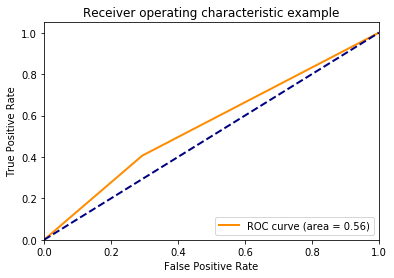

In [91]:
# Для 2 ближайших соседей
draw_roc_curve(y_test_2, target1_1, pos_label=1, average='micro')

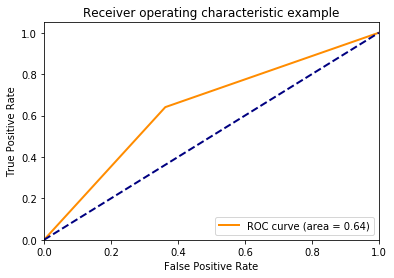

In [92]:
# Для 10 ближайших соседей
draw_roc_curve(y_test_2, target1_2, pos_label=1, average='micro')

## Пункт 5. Кросс-валидация

Наиболее простым способом кросс-валидации является вызов функции cross_val_score. В этом случае стратегия кросс-валидации определяется автоматически.

In [118]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data_2, y_2, cv=3)

In [119]:
# Значение метрики accuracy для 3 фолдов
scores

array([0.6039604 , 0.53465347, 0.62376238])

In [120]:
# Усредненное значение метрики accuracy для 3 фолдов
np.mean(scores)

0.5874587458745876

In [122]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data_2, y_2, cv=3,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.59762063, 0.52841028, 0.61555084]), 0.5805272521618782)

In [123]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        data_2, y_2, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00701284, 0.00399733, 0.00498366]),
 'score_time': array([0.03296638, 0.02498293, 0.03598189]),
 'test_f1': array([0.59762063, 0.52841028, 0.61555084]),
 'test_precision': array([0.63173167, 0.55370687, 0.6598517 ]),
 'test_recall': array([0.6039604 , 0.53465347, 0.62376238]),
 'train_f1': array([0.77596839, 0.81892928, 0.77596839]),
 'train_precision': array([0.85264997, 0.87190594, 0.85264997]),
 'train_recall': array([0.78217822, 0.82178218, 0.78217822])}

## Стратегии кросс-валидации
### K-fold

In [126]:
# Возвращаются индексы элементов
X = ["a", "b", "c"]
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2] [0]
[0 2] [1]
[0 1] [2]


In [127]:
X = range(12)
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 4  5  6  7  8  9 10 11] [0 1 2 3]
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]


In [128]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data_2, y, 
                         cv=KFold(n_splits=3))
scores

array([0.16831683, 0.56435644, 0.46534653])

In [129]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        data_2, y, scoring=scoring, 
                        cv=KFold(n_splits=3), return_train_score=True)
scores

c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


{'fit_time': array([0.00899529, 0.00399804, 0.00600004]),
 'score_time': array([0.03897667, 0.02598548, 0.0289824 ]),
 'test_f1': array([0.28813559, 0.55414336, 0.63513514]),
 'test_precision': array([1.        , 0.69316227, 1.        ]),
 'test_recall': array([0.16831683, 0.56435644, 0.46534653]),
 'train_f1': array([0.80387838, 0.79945524, 0.89967881]),
 'train_precision': array([0.86178676, 0.86071429, 0.93169995]),
 'train_recall': array([0.82673267, 0.80693069, 0.89108911])}

## Repeated k-fold

In [130]:
X = range(12)
kf = RepeatedKFold(n_splits=3, n_repeats=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 0  1  2  3  5  9 10 11] [4 6 7 8]
[ 3  4  6  7  8  9 10 11] [0 1 2 5]
[0 1 2 4 5 6 7 8] [ 3  9 10 11]
[ 0  1  2  3  6  7  9 11] [ 4  5  8 10]
[ 0  1  2  3  4  5  8 10] [ 6  7  9 11]
[ 4  5  6  7  8  9 10 11] [0 1 2 3]


## Leave one out (LOO)

In [131]:
X = range(12)
# Эквивалент KFold(n_splits=n)
kf = LeaveOneOut()
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11] [0]
[ 0  2  3  4  5  6  7  8  9 10 11] [1]
[ 0  1  3  4  5  6  7  8  9 10 11] [2]
[ 0  1  2  4  5  6  7  8  9 10 11] [3]
[ 0  1  2  3  5  6  7  8  9 10 11] [4]
[ 0  1  2  3  4  6  7  8  9 10 11] [5]
[ 0  1  2  3  4  5  7  8  9 10 11] [6]
[ 0  1  2  3  4  5  6  8  9 10 11] [7]
[ 0  1  2  3  4  5  6  7  9 10 11] [8]
[ 0  1  2  3  4  5  6  7  8 10 11] [9]
[ 0  1  2  3  4  5  6  7  8  9 11] [10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]


## Пункт 6. Подбор гиперпараметра K с использованием GridSearchCV И кросс-валидации.

In [132]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [135]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(x_train_2, y_train_2)

c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [136]:
clf_gs.cv_results_

c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\masha\vir

{'mean_fit_time': array([0.00519791, 0.00379801, 0.00739608, 0.00999398, 0.00639653,
        0.00359864, 0.00399799, 0.00419803, 0.00379806, 0.00400114]),
 'mean_score_time': array([0.00599551, 0.00419712, 0.00999403, 0.01299243, 0.00799522,
        0.00479641, 0.0059989 , 0.00499644, 0.00499663, 0.0045969 ]),
 'mean_test_score': array([0.61878453, 0.66298343, 0.64640884, 0.61325967, 0.6519337 ,
        0.6519337 , 0.62430939, 0.61325967, 0.62430939, 0.63535912]),
 'mean_train_score': array([0.78592912, 0.74306513, 0.71689655, 0.67960728, 0.68099617,
        0.68930077, 0.69069923, 0.67687739, 0.66721264, 0.66168582]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n

In [137]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [138]:
# Лучшее значение метрики
clf_gs.best_score_

0.6629834254143646

In [139]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 10}

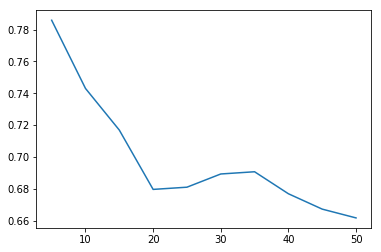

In [140]:
# Изменение качества на обучающей выборке
plt.plot(n_range, clf_gs.cv_results_['mean_train_score'])

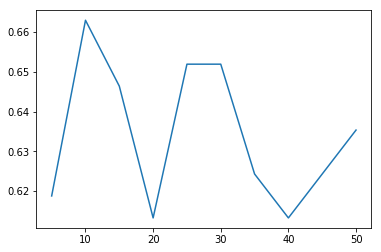

In [141]:
# Изменение качества на тестовой выборке
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [149]:
nested_scores = np.zeros(3)
for i in range(3):
    nested_score = cross_val_score(clf_gs, X=x_train_2, y=y_train_2, cv=3)
    nested_scores[i] = nested_score.mean()

c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\masha\virtualenvs\tensorflow\lib\site-packages

AttributeError: 'numpy.ndarray' object has no attribute 'best_score_'

**************************************
Проверяемая точка:  [204, 172]
Вывод отсортированного списка соседей:
y=1, расстояние=1060.00
y=1, расстояние=1325.00
y=1, расстояние=2341.00
y=1, расстояние=11234.00
y=0, расстояние=11336.00
y=1, расстояние=12456.00

Вывод расстояния для отсортированного списка соседей:


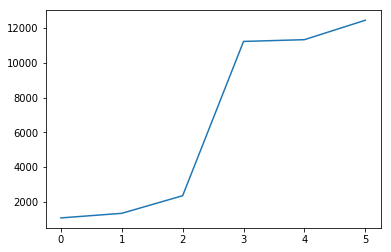

Вывод К ближайших соседей:
y=1, расстояние=1060.00
y=1, расстояние=1325.00
y=1, расстояние=2341.00
y=1, расстояние=11234.00
y=0, расстояние=11336.00
y=1, расстояние=12456.00

Визуализация К ближайших соседей:


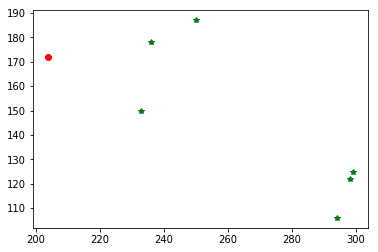

Классы, соответствующие К ближайшим соседям:
класс=1, количество элементов=5
класс=0, количество элементов=1
**************************************
Проверяемая точка:  [273, 125]
Вывод отсортированного списка соседей:
y=0, расстояние=634.00
y=1, расстояние=676.00
y=1, расстояние=802.00
y=1, расстояние=2225.00
y=1, расстояние=4178.00
y=1, расстояние=4373.00

Вывод расстояния для отсортированного списка соседей:


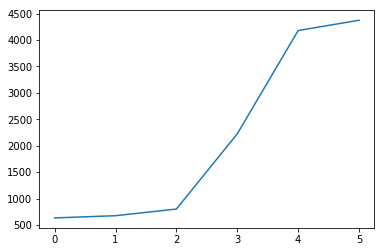

Вывод К ближайших соседей:
y=0, расстояние=634.00
y=1, расстояние=676.00
y=1, расстояние=802.00
y=1, расстояние=2225.00
y=1, расстояние=4178.00
y=1, расстояние=4373.00

Визуализация К ближайших соседей:


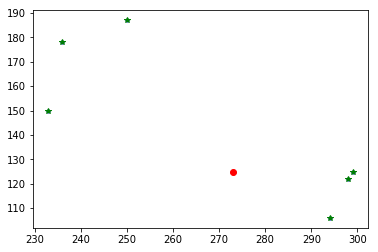

Классы, соответствующие К ближайшим соседям:
класс=1, количество элементов=5
класс=0, количество элементов=1
**************************************
Проверяемая точка:  [247, 143]
Вывод отсортированного списка соседей:
y=1, расстояние=245.00
y=1, расстояние=1346.00
y=1, расстояние=1945.00
y=1, расстояние=3028.00
y=0, расстояние=3042.00
y=1, расстояние=3578.00

Вывод расстояния для отсортированного списка соседей:


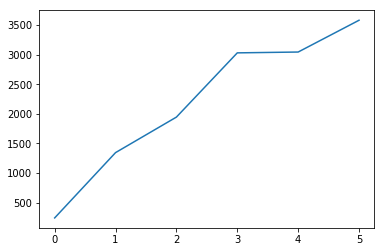

Вывод К ближайших соседей:
y=1, расстояние=245.00
y=1, расстояние=1346.00
y=1, расстояние=1945.00
y=1, расстояние=3028.00
y=0, расстояние=3042.00
y=1, расстояние=3578.00

Визуализация К ближайших соседей:


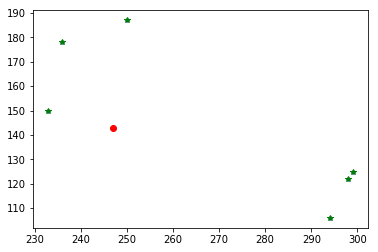

Классы, соответствующие К ближайшим соседям:
класс=1, количество элементов=5
класс=0, количество элементов=1
**************************************
Проверяемая точка:  [354, 163]
Вывод отсортированного списка соседей:
y=1, расстояние=4469.00
y=0, расстояние=4817.00
y=1, расстояние=6849.00
y=1, расстояние=11392.00
y=1, расстояние=14149.00
y=1, расстояние=14810.00

Вывод расстояния для отсортированного списка соседей:


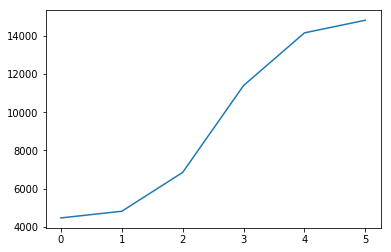

Вывод К ближайших соседей:
y=1, расстояние=4469.00
y=0, расстояние=4817.00
y=1, расстояние=6849.00
y=1, расстояние=11392.00
y=1, расстояние=14149.00
y=1, расстояние=14810.00

Визуализация К ближайших соседей:


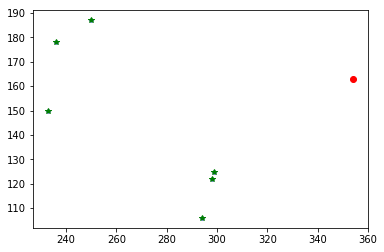

Классы, соответствующие К ближайшим соседям:
класс=1, количество элементов=5
класс=0, количество элементов=1


[1, 1, 1, 1]

In [151]:
# Для всех объектов тестовой выборки (классификация)
simple_knn_clas_prediction = simple_knn_clas.predict(K=10, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_test=x_test[['chol','thalach']])
simple_knn_clas_prediction

In [152]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(x_train_2, y_train_2)
target1_2 = cl1_2.predict(x_test_2)
target1_2

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [154]:
accuracy_score(y_test_2, target1_2)

0.639344262295082

## Построение кривой обучения

In [155]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

c:\users\masha\virtualenvs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 2 instead of 5).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


<module 'matplotlib.pyplot' from 'c:\\users\\masha\\virtualenvs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

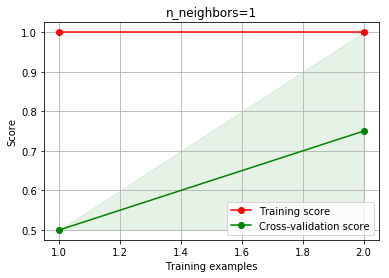

In [165]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=1), 'n_neighbors=1', 
                    x_train, y_train, cv=2)

## Построение кривой валидации

In [166]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\masha\\virtualenvs\\tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

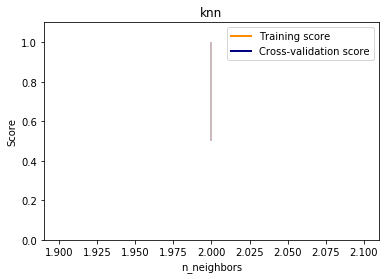

In [180]:
n_range=[2]
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      x_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=2, scoring="accuracy")